In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train[0].shape

(28, 28)

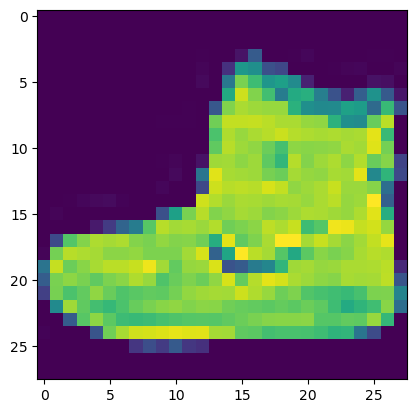

In [5]:
plt.imshow(x_train[0])

In [6]:
x_train.max()

255

In [7]:
x_train = x_train/255

In [8]:
x_test = x_test/255

In [9]:
x_test.min()

0.0

In [10]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
y_train[0]

9

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_cat_train = to_categorical(y_train,10)

In [14]:
y_cat_test = to_categorical(y_test,10)

In [15]:
x_train = x_train/255
y_train = y_train/255

In [16]:
y_cat_train.shape

(60000, 10)

In [17]:
y_cat_test.shape

(10000, 10)

In [18]:
## Reshaping

In [19]:
x_train.shape

(60000, 28, 28)

In [20]:
x_test.shape

(10000, 28, 28)

In [21]:
x_train = x_train.reshape(60000,28,28,1)

In [22]:
x_test = x_test.reshape(10000,28,28,1)

In [23]:
x_train.shape

(60000, 28, 28, 1)

In [24]:
x_test.shape

(10000, 28, 28, 1)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))


# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy']) # we can add in additional metrics 

D:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [28]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.5708 - loss: 1.2352 - val_accuracy: 0.6710 - val_loss: 97.0951
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7783 - loss: 0.5932 - val_accuracy: 0.7111 - val_loss: 71.6905
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8065 - loss: 0.5249 - val_accuracy: 0.6990 - val_loss: 92.8280
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8241 - loss: 0.4839 - val_accuracy: 0.7056 - val_loss: 87.7465


In [29]:
prediction = np.argmax(model.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75      1000
           1       0.62      0.97      0.76      1000
           2       0.73      0.51      0.60      1000
           3       0.90      0.31      0.46      1000
           4       0.44      0.93      0.60      1000
           5       0.86      0.81      0.83      1000
           6       0.49      0.20      0.28      1000
           7       0.94      0.73      0.82      1000
           8       0.89      0.94      0.92      1000
           9       0.76      0.98      0.86      1000

    accuracy                           0.71     10000
   macro avg       0.75      0.71      0.69     10000
weighted avg       0.75      0.71      0.69     10000

